In [1]:
import pandas as pd
import re
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import correlations

In [2]:
file_dir = os.path.dirname(os.path.realpath('__file__'))
all_data_files = [file for file in os.listdir(Path(os.path.join(file_dir, "../data/crypto")))]
all_data_files

['USDT_XMR_D.pkl',
 '.DS_Store',
 'USDT_DASH_D.pkl',
 'USDT_LTC_D.pkl',
 'USDT_XRP_D.pkl',
 'USDT_BTC_D.pkl',
 'USDT_ETH_D.pkl',
 'USDT_STR_D.pkl']

In [3]:
daily_pickle_files = []
for file in all_data_files:
    if len(file) > 6 and file[-6:] == "_D.pkl":
        daily_pickle_files.append(file)
daily_pickle_files

['USDT_XMR_D.pkl',
 'USDT_DASH_D.pkl',
 'USDT_LTC_D.pkl',
 'USDT_XRP_D.pkl',
 'USDT_BTC_D.pkl',
 'USDT_ETH_D.pkl',
 'USDT_STR_D.pkl']

In [4]:
dfs = []
for file in daily_pickle_files:
    df = correlations.get_crypto_pickle_df(f"../data/crypto/{file}").rename(correlations.filepath_to_filename(file))
    dfs.append(df)
dfs

[date
 2016-01-02      0.55
 2016-01-03      0.47
 2016-01-04      0.47
 2016-01-05      0.47
 2016-01-06      0.47
                ...  
 2021-12-28    220.41
 2021-12-29    209.08
 2021-12-30    214.51
 2021-12-31    225.50
 2022-01-01    230.19
 Name: USDT_XMR_D, Length: 2192, dtype: float64,
 date
 2016-01-02      3.64
 2016-01-03      2.87
 2016-01-04      3.47
 2016-01-05      3.01
 2016-01-06      3.01
                ...  
 2021-12-28    150.50
 2021-12-29    134.72
 2021-12-30    132.68
 2021-12-31    133.89
 2022-01-01    134.51
 Name: USDT_DASH_D, Length: 2192, dtype: float64,
 date
 2016-01-02      3.568
 2016-01-03      3.435
 2016-01-04      3.435
 2016-01-05      3.569
 2016-01-06      3.455
                ...   
 2021-12-28    155.789
 2021-12-29    145.763
 2021-12-30    145.531
 2021-12-31    147.886
 2022-01-01    146.231
 Name: USDT_LTC_D, Length: 2192, dtype: float64,
 date
 2016-01-02    0.0061
 2016-01-03    0.0061
 2016-01-04    0.0061
 2016-01-05    0.0061
 20

In [5]:
joined = pd.concat(dfs, axis=1).dropna()
joined

,USDT_XMR_D,USDT_DASH_D,USDT_LTC_D,USDT_XRP_D,USDT_BTC_D,USDT_ETH_D,USDT_STR_D
date,,,,,,,
2016-01-02,0.55,3.64,3.568,0.0061,434.98,0.95,0.0016
2016-01-03,0.47,2.87,3.435,0.0061,432.31,0.95,0.0016
2016-01-04,0.47,3.47,3.435,0.0061,427.29,0.96,0.0016
2016-01-05,0.47,3.01,3.569,0.0061,430.14,0.93,0.0016
2016-01-06,0.47,3.01,3.455,0.0060,430.17,0.93,0.0016
...,...,...,...,...,...,...,...
2021-12-28,220.41,150.50,155.789,0.9236,50695.03,4037.79,0.2971
2021-12-29,209.08,134.72,145.763,0.8524,47557.33,3793.87,0.2753
2021-12-30,214.51,132.68,145.531,0.8168,46446.19,3629.30,0.2642


In [9]:
correlation_pairs_pearson = joined.corr(method="pearson")
correlation_pairs_spearman = joined.corr(method="spearman")
correlation_pairs_pearson, correlation_pairs_spearman

(             USDT_XMR_D  USDT_DASH_D  USDT_LTC_D  USDT_XRP_D  USDT_BTC_D  \
 USDT_XMR_D     1.000000     0.730191    0.954094    0.914090    0.759790   
 USDT_DASH_D    0.730191     1.000000    0.671811    0.669254    0.210478   
 USDT_LTC_D     0.954094     0.671811    1.000000    0.880829    0.800894   
 USDT_XRP_D     0.914090     0.669254    0.880829    1.000000    0.687474   
 USDT_BTC_D     0.759790     0.210478    0.800894    0.687474    1.000000   
 USDT_ETH_D     0.753817     0.247824    0.761685    0.738431    0.928355   
 USDT_STR_D     0.908245     0.593322    0.892687    0.901704    0.742738   
 
              USDT_ETH_D  USDT_STR_D  
 USDT_XMR_D     0.753817    0.908245  
 USDT_DASH_D    0.247824    0.593322  
 USDT_LTC_D     0.761685    0.892687  
 USDT_XRP_D     0.738431    0.901704  
 USDT_BTC_D     0.928355    0.742738  
 USDT_ETH_D     1.000000    0.713634  
 USDT_STR_D     0.713634    1.000000  ,
              USDT_XMR_D  USDT_DASH_D  USDT_LTC_D  USDT_XRP_D  USDT_B

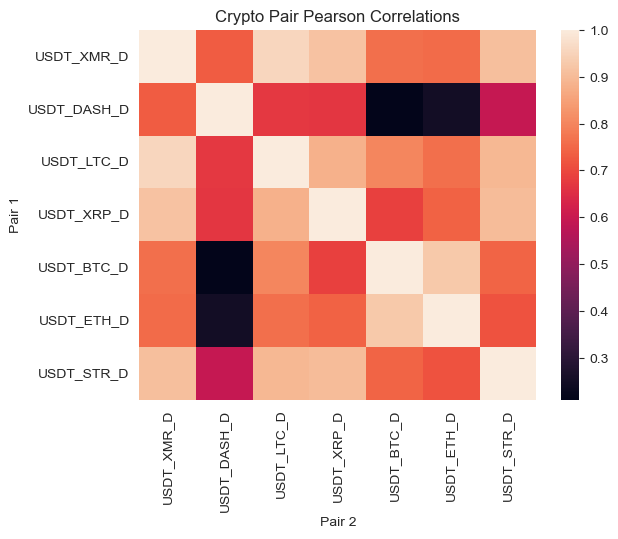

In [11]:
hm = seaborn.heatmap(correlation_pairs_pearson)
# plt.show()
plt.title("Crypto Pair Pearson Correlations")
plt.ylabel("Pair 1")
plt.xlabel("Pair 2")
# bottom, top = hm.get_ylim()
# hm.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig(fname="pearson_crypto_heatmap.png", format="png", bbox_inches='tight')

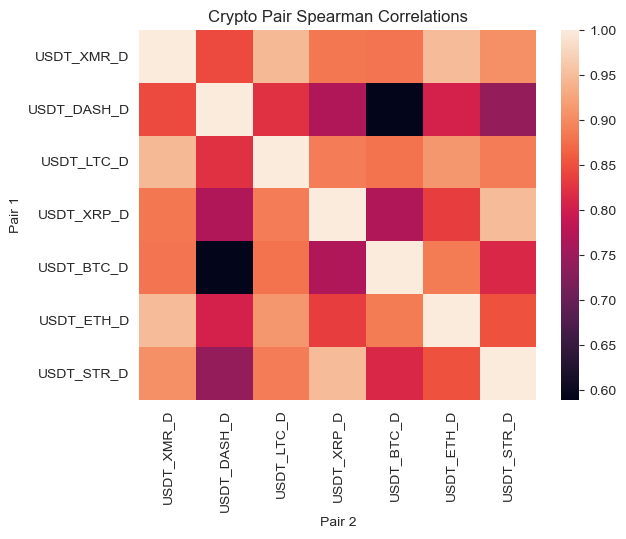

In [12]:
hm2 = seaborn.heatmap(correlation_pairs_spearman)
# plt.show()
plt.title("Crypto Pair Spearman Correlations")
plt.ylabel("Pair 1")
plt.xlabel("Pair 2")
# bottom, top = hm.get_ylim()
# hm.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig(fname="spearman_crypto_heatmap.png", format="png", bbox_inches='tight')